# PCA and t-SNE visualization
  * From Derksen, Luuk. “Visualising High-Dimensional Datasets Using PCA and t-SNE in Python.” Medium, Medium, 29 Oct. 2016, medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b.
  * More details - http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
  * On Eigenvalues and Eigenvectors - https://www.math.hmc.edu/calculus/tutorials/eigenstuff/

## Download the MINST dataset

In [77]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
# print(mnist.data.shape)
# print(mnist.target.shape)
X = mnist.data
Y = mnist.target
# print(X)

## Convert to data frame

In [78]:
import pandas as pd
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
# print(feat_cols)
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = Y

X, Y = None, None
# print('Size of the dataframe: {}'.format(df.shape))
rndperm = np.random.permutation(df.shape[0])
# print(rndperm)
# print(df[feat_cols].values)

## Debug randomization of shape[0]

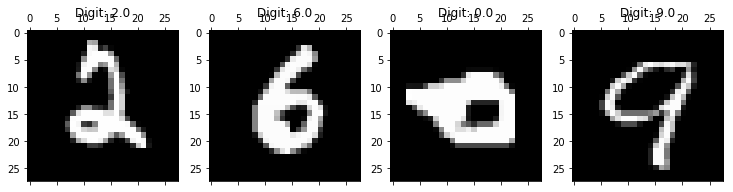

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(32,14) )
for i in range(0,4):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

## Top 3 using PCA

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


## Plot first 2 PCA components

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()
ax.scatter(df['pca-one'], df['pca-three'],c=['red', 'blue'])
ax.legend()
ax.grid(True)

plt.show()
